In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
import sys
sys.path.append('home/petar.petrov/eigen/')
import json
import spacy
from spacy import en_core_web_md

ImportError: cannot import name 'en_core_web_md'

In [9]:
spacy_model = en_core_web_md.load()

NameError: name 'en_core_web_md' is not defined

In [3]:
import json
with open('Revolving_Loan_cheatsheet.json') as jsonfile:
    raw_data = json.load(jsonfile)

In [4]:
for i in range(len(raw_data[0]['Data'])):
    print('\n',raw_data[0]['Data'][i]['document_name'],':\n',[ans['text'] for ans in raw_data[0]['Data'][i]['document_answers']])


 29_Seawell_evaluationset.txt :
 ['a multicurrency revolving loan facility in an aggregate amount equal to the Total Facility A Commitments']

 03_SNC_trainingset.txt :
 ['The Lenders, individually, and not solidarily (and not jointly and severally), agree to make available to the Borrowers a revolving credit facility (the “Revolving Facility”).']

 06_Caruna_trainingset.txt :
 ['a Base Currency revolving credit facility in an aggregate amount equal to the Total Capex Facility Commitments capable of being reborrowed as contemplated by this Agreement;']

 13_GFI_trainingset.txt :
 ['Subject to the terms of this Agreement, the Lenders make available to the Borrower a dollar revolving loan facility with a term out option in an aggregate amount equal to the Total Commitments.']

 20_Nordural_trainingset.txt :
 ['Subject to the terms of this Agreement, the Banks agree to make a Loan during the Commitment Period to the Borrower up\nto an aggregate principal amount not exceeding the Total Co

In [47]:
doc_1 = spacy_model(raw_data[0]['Data'][-2]['document_answers'][0]['text'])

In [48]:
doc_1.text

'Subject to the terms and conditions and relying upon the representations and warranties herein set forth, each Lender agrees, severally and not jointly to make\n(x) Australian Revolving Loans in dollars to any Australian Borrower, (y) Dutch Revolving Loans, at the applicable Borrower’s option, in dollars or euros to any Dutch Borrower and (z) U.S. Revolving Loans, at the applicable Borrower’s option, in dollars or euros to any U.S. Borrower, in each case at any time and from time to time on or after the Closing Date until the earlier of one Business Day prior to the Revolving Maturity Date and the termination of the Revolving Commitment of such Lender in accordance with the terms hereof'

In [57]:
print('POS; DEP; OTHER')
for token in doc_1:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape, token.is_alpha, token.is_stop)
    
print('NER')
for ent in doc_1.ents:
    print(ent.text, ent.label_)

POS; DEP; OTHER
Subject subject VERB VB advcl 489846 True False
to to ADP IN prep 21614 True False
the the DET DT det 29016 True False
terms term NOUN NNS pobj 53773 True False
and and CCONJ CC cc 29016 True False
conditions condition NOUN NNS conj 53773 True False
and and CCONJ CC cc 29016 True False
relying rely VERB VBG conj 53773 True False
upon upon ADP IN prep 53773 True False
the the DET DT det 29016 True False
representations representation NOUN NNS pobj 53773 True False
and and CCONJ CC cc 29016 True False
warranties warranty NOUN NNS conj 53773 True False
herein herein ADV RB advmod 53773 True False
set set VERB VBN acl 29016 True False
forth forth PART RP prt 53773 True False
, , PUNCT , punct 450 False False
each each DET DT det 53773 True False
Lender lender PROPN NNP nsubj 489846 True False
agrees agree VERB VBZ ROOT 53773 True False
, , PUNCT , punct 450 False False
severally severally ADV RB advmod 53773 True False
and and CCONJ CC cc 29016 True False
not not ADV RB neg

<module 'spacy.gold' from '/home/petar.petrov/anaconda3/envs/eigen/lib/python3.6/site-packages/spacy/gold.cpython-36m-x86_64-linux-gnu.so'>

In [ ]:
#Import all text (or make it easily accessible with stream)

In [ ]:
# ALP Again

In [27]:
import sys
#sys.path.append("/home/petar.petrov/eigentech")
sys.path.append('/home/petar.petrov/prototypes')
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

import re

from collections import Iterable

from scipy.stats import hmean, genlogistic

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import wordpunct_tokenize

import spacy
import en_core_web_sm
spacy_model = en_core_web_sm.load()

from alp.AlpCalculations import alp_similarity as alp


# nltk.download("stopwords")  # do this for first run
stop_words = set(stopwords.words('english'))  # this will allow us to remove unnecessary words
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '%', '-']) # remove it if you need punctuation
stemmer = SnowballStemmer("english")  # this will shorten words to their stems for better comparison

def pre_test(text):
    # remove stopwords
    count = 0  # counts non-stopwords in text
    filtered_word_list = []
    for word in nltk.wordpunct_tokenize(text): # iterate over word_list
        if word not in stop_words: 
            filtered_word_list.append(stemmer.stem(word.lower())) # remove word from filtered_word_list if it is a stopword
            count += 1
    # stem
    filtered_string = " ".join(filtered_word_list)
    return filtered_string  

def probe_tokenization(text,spacy_model):
    spacy_doc = spacy_model(text)
    rtn = [tk.lemma_ for tk in spacy_doc if not (tk.is_stop or tk.is_punct or tk.is_space)]
    return rtn

##########################
## ALP score calculation
##########################
def alp_similarity(probe, compare):
    max_score = 0
    max_idx = -1
    assert len(probe) <= len(compare)
    rtn = []
    can_print = False
    for i in range(len(compare)-len(probe)):
        if can_print and int(float(i)/(len(compare)-len(probe))*100)%10 == 0:
            can_print = False
            print('Progress: {}%'.format(int(float(i)/(len(compare)-len(probe))*100)), end='\r')
        elif not can_print and int(float(i)/(len(compare)-len(probe))*100)%10 == 1:
            can_print = True
        rtn.append(alp(probe,compare[i:i+len(probe)]))
        if rtn[-1] > max_score:
            max_idx = i
            max_score = rtn[-1]
    print('peak score: {}; and position: {} of probe: {}'.format(max_score,max_idx, ' '.join(probe)))
    return list(enumerate(rtn))


def max_probe_signal(probes, compare):
    # TODO should use arrays here because we know both size and type
    individual_signals = []
    for probe in probes:
        individual_signals.append(alp_similarity(probe,compare))
    rtn = combine_signal(individual_signals)
    return rtn

def combine_signal(individual_signals):
    # TODO this function can be augmented to do a more sophisticated signal combination
    rtn = list(map(max,zip(*individual_signals)))
    return rtn

#################################################
## Find all repeated elements within the probes
#################################################
def get_all_matches_from_list(list_strings, min_match_len=5):
    len_list = len(list_strings)
    all_matched_strings = []
    for str1 in range(len_list-1):
        for str2 in range(str1+1,len_list):
            all_matched_strings+= common_substring_list_conv(list_strings[str1], list_strings[str2], min_match_len)
    all_matched_strings = sorted(set_from_iterables(all_matched_strings), key=len, reverse=True)
    return all_matched_strings

def common_substring_list_static(str1, str2, min_match_len):
    loop_len = min(len(str1), len(str2))
    curr_match_len = 0
    matched_strings = []
    for i in range(loop_len):
        if str1[i] == str2[i]:
            curr_match_len+=1
            if i == loop_len-1 and curr_match_len >= min_match_len:
                curr_matched_string = str1[(i-curr_match_len+1):(i+1)]
                matched_strings.append(curr_matched_string)
        else:
            if curr_match_len >= min_match_len:
                curr_matched_string = str1[(i-curr_match_len):i]
                matched_strings.append(curr_matched_string)
            curr_match_len = 0
    return matched_strings

def common_substring_list_conv(str1, str2, min_match_len):
    len1 = len(str1)
    len2 = len(str2)
    strlen = max(len1, len2)

    all_matched_strings = []
    for t in range(strlen):
        x1 = str1[(strlen-t-1):strlen ]
        all_matched_strings = all_matched_strings+common_substring_list_static(x1, str2, min_match_len)
    for t in range(strlen):
        x2 = str2[(strlen - t - 1):strlen]
        all_matched_strings = all_matched_strings + common_substring_list_static(x2, str1, min_match_len)

    all_matched_strings = sorted(set_from_iterables(all_matched_strings), key=len, reverse=True)
    return all_matched_strings

###############################################################################
## Find all combinations of matches(probes) that cover enough of the examples
###############################################################################
class ProbeBuilder:
    # TODO: Figure out how to use references and pointers in numpy arrays instead of lists
    def __init__(self, unique_matches, original_probes, coverage_ratio_thres):
        self.all_matches = unique_matches
        self.all_strings = original_probes
        self.coverage_ratio_thres = coverage_ratio_thres
        # stack of potential list of probes that cover enough of the examples
        self.match_stack = list()
        # stack of remaining examples that need to be covered
        self.remaining_stack = list(range(len(self.all_strings)))
        # return list of suggested probe subsets and their coverage
        self.combos = list()
        self.recurring_function()
        
    
    
    def recurring_function(self,i_prev = -1):
        # TODO, calc len(self.all_matches) in init and save value
        for i in range(i_prev + 1, len(self.all_matches)):
            add = False
            if any([(is_subset(self.all_matches[j],self.all_matches[i]) or 
                    is_subset(self.all_matches[i],self.all_matches[j]))
                    for j in self.match_stack]):
                continue
            # strings covered by all_matches[i]
            local_stack = list()
            s = 0
            while s < len(self.remaining_stack):
            #for s in range(len(self.remaining_stack)):
                if is_subset(self.all_matches[i],self.all_strings[self.remaining_stack[s]]):
                    add = True
                    # how can this be efficient? Not really a stack operation
                    # maybe use position in all_strings instead of actual string
                    local_stack.append(self.remaining_stack.pop(s))
                    s -= 1
                s += 1
            if not add:
                continue
            try:
                current_coverage = 1. - float(len(self.remaining_stack))/len(self.all_strings)
            except ZeroDivisionError:
                print('Why are there no examples in self.all_strings?')
                raise
            self.match_stack.append(i)
            if current_coverage < self.coverage_ratio_thres:
                self.recurring_function(i)
            else:
                self.combos.append((current_coverage,[self.all_matches[ii] for ii in self.match_stack]))
            self.match_stack.pop()
            while local_stack:
                self.remaining_stack.append(local_stack.pop())


###########################################
## Combine scores from different factors
###########################################
def calc_scores(final_probes, all_strings, l_c_ratio=1.):
    coverage_score, success_match_list = zip(*final_probes)
    length_score = [] # harmonic mean of the lengths
    final_score = []

    for cr, sm in final_probes:
        l = hmean(list(map(len,sm)))
        length_score.append(l)
        fs = final_score_function(cr,0,l,len(sm), l_c_ratio)
        final_score.append(fs)
    
    ret = {
        'final': final_score,
        'coverage': coverage_score,
        'overlap': [0]*len(coverage_score),
        'length': length_score,
        'match_list': success_match_list
    }
    return ret

def final_score_function(coverage, overlap, length, number, l_c_ratio):
    coverage_score = transform_coverage(coverage)
    length_score = transform_length(length)
    overlap_score = overlap
    weight_c = 1/(1+l_c_ratio)
    weight_l = l_c_ratio/(1+l_c_ratio)
    weight_o = 0.
    base_n = 1.2 # not sure a power law is the best solution here
    return (coverage_score*weight_c + length_score*weight_l + overlap_score*weight_o)*pow(base_n,-number)

def transform_coverage(coverage):
    p_c = 0.3
    scale_c = genlogistic.ppf(0.99,p_c)-genlogistic.ppf(0.01,p_c)
    loc_c = genlogistic.ppf(0.01,p_c)
    coverage_score = genlogistic.cdf(coverage*scale_c,p_c,-loc_c)
    return coverage_score

def transform_length(length):
    p_l = 0.3
    scale_l = genlogistic.ppf(0.99,p_l)-genlogistic.ppf(0.01,p_l)
    loc_l = genlogistic.ppf(0.01,p_l)
    length_score = 1 - genlogistic.cdf((1-length/15)*scale_l,p_l,-loc_l)
    return length_score


#########################
## Auxiliary functions
#########################
def alpha_only_string(list_strings):
    new_list = []
    for s in list_strings:
        s = re.sub(r'\W+', '', s)
        new_list.append(s.lower())
    return new_list

def set_from_iterables(iter_objects):
    rtn = iter_objects.copy()
    assert all(map(lambda x: isinstance(x,Iterable),iter_objects))
    # How do I check if objects can be compared with == operator?
    # Right now only assume this is the case
    i = 0
    while i < len(rtn)-1:
        for j in range(i+1,len(rtn)):
            if rtn[i] == rtn[j]:
                rtn.pop(i)
                i -= 1
                break
        i += 1
    return rtn

def is_subset(small_set, big_set):
    # Assume the objects in the lists can be compared with ==
    if len(small_set) > len(big_set):
        return False
    assert len(small_set)
    assert type(small_set) == type(big_set)
    if isinstance(small_set,str):
        return small_set in big_set
    for i in range(len(big_set)-len(small_set) + 1):
        found_match = True
        for j in range(len(small_set)):
            if small_set[j] != big_set[i+j]:
                found_match = False
                break
        if found_match:
            return True
    return False

######################
## results analysis
######################
def split_results(res):
    res_copy = res.copy()
    end_res = []
    while res_copy:
        curr = res_copy.pop(0)
        this_res = [1,curr[1]]
        idx = 0
        while idx < len(res_copy):
            comp = res_copy.pop(0)
            if comp[1] == curr[1]:
                this_res[0] += 1
            else:
                res_copy.append(comp)
            idx += 1
        end_res.append(this_res)
    return end_res

def get_stats(the_list):
    # the_list = [ [file,[1/0,tot]]]
    sig_eff = 0
    false_pos = 0
    for _,(hit,shots) in the_list:
        sig_eff += hit
        if hit:
            false_pos += shots - 1
        else:
            false_pos += shots
    recall = sig_eff / float(len(the_list))
    precision = float(sig_eff) / (sig_eff + false_pos)
    return recall,precision

In [58]:
inputs = ["Blue blue hoiawerhio aew haoewtuha dg bdkfgbj sbdfgaweta eria e",
"Blue Blue hoaewiohhoaet awheotohiae t fnanasasb a",
"Green Green ioaehoiraoihwe hsodhhaoweto hao haweho oawet h",
"Green Green ioauwoiopwpu hojsdfjasdf  abebkawenrba wetaseohoijdfgo", 
"Blue Blue oahiweoihtaohie aweruoiohwaer  aof oha",
"oahewrhoahoie tboaewtho aetohahweot hoBlue blue ",
"blue blue oaiwero jawerhjjkhaewhio df ubieuirtho pfh  anb as",
"green green iaweriho ohahuwe green grenen iio[aewior[iawoeru",
"oiawerhoiaewhoi rehiowrhioawehoi thio paeth ihio aewhtio green green",
"(g)  Governing Law. This Agreement and each blue blue Confirmation will be governed by, and construed and enforced in accordance with, the substantive law of the State of New York, without reference to its choice of law doctrine."
,"(g)  Governing Law. This Agreement and egreen greenach Confirmation will be governed by, and construed and enforced in accordance with, the substantive law of the State of New York, without reference to its choice of law doctrine."
,"(h)  Governing Law blue blue. Section 13(a) is hereby replaced with the following: (a)  Governing Law. This Agreement and each Transaction entered into hereunder will be governed by, and construed and enforced in accordance with, the law of the State of New York without reference to its choice of law doctrine. (i)  Jurisdiction. Section 13(b) is hereby amended by:"
,"(a)  Governing Law. This Agreement and each Transaction entered into hereunder will be governed by, and cogreen greennstrued and enforced in accordance with, the law of England and Wales."
,"(a)  Governing Law. This Agreement, any non-contractualblue blue blue obligations arising out of or in relation to this Agreement and each Transaction entered into hereunder will be governed by, and construed and enforced in accordance with, the law of England and Wales."
,"4.  Governing Law. This Amendment wigreen green greenll be governed by and construed in accordance with the laws of the State of New York (without reference to its conflict of laws doctrine). 5.  Counterparts. This Amendment may be executed in any number of counterparts, all of which taken together shall constitute one and the same instrument."  
]

#all_strings = alpha_only_string(inputs)
all_strings = list(map(lambda x: x.split(),map(pre_test,inputs)))
str2 = 'ab sdef g'
str1 = 'not sdef'
str3 = 'and not sdef'
#all_strings = [str1.split(),str2.split(),str3.split()]
coverage_ratio_thres = .6

In [66]:
# Sequence to build probes
all_matches = get_all_matches_from_list(all_strings)
probe_set = ProbeBuilder(all_matches, all_strings, coverage_ratio_thres)
final = calc_scores(final_probes=probe_set.combos, all_strings=all_strings)
ordered_indices = list(zip(*sorted([(v,i) for i,v in enumerate(final['final'])], reverse=True)))[1]


In [67]:
choice = [(final['final'][i], final['coverage'][i],final['length'][i], final['match_list'][i]) for i in ordered_indices[:10]]
for fn,c,l,m in choice:
    print('tot_score = {:.3}; tr_cov({:.2}) = {:.2}; tr_len({:.2}) = {:.2} \n{}\n'.format(fn,c,transform_coverage(c),
                                                                    l,transform_length(l),
                                                                    m))

tot_score = 0.267; tr_cov(0.87) = 0.9; tr_len(2.6) = 0.17 
[['law', 'state', 'new', 'york', 'without', 'refer'], ['green', 'green'], ['blue', 'blue']]

tot_score = 0.264; tr_cov(0.87) = 0.9; tr_len(1.0) = 0.033 
[['blue'], ['green']]

tot_score = 0.26; tr_cov(0.87) = 0.9; tr_len(3.4) = 0.3 
[['confirm', 'govern', 'constru', 'enforc', 'accord', 'substant', 'law', 'state', 'new', 'york', 'without', 'refer', 'choic', 'law', 'doctrin'], ['govern', 'law', 'this', 'agreement', 'transact', 'enter', 'hereund', 'govern'], ['green', 'green'], ['blue', 'blue']]

tot_score = 0.257; tr_cov(0.87) = 0.9; tr_len(3.3) = 0.29 
[['confirm', 'govern', 'constru', 'enforc', 'accord', 'substant', 'law', 'state', 'new', 'york', 'without', 'refer', 'choic', 'law', 'doctrin'], ['accord', 'law', 'state', 'new', 'york', 'without', 'refer'], ['green', 'green'], ['blue', 'blue']]

tot_score = 0.254; tr_cov(0.87) = 0.9; tr_len(3.2) = 0.28 
[['law', 'state', 'new', 'york', 'without', 'refer', 'choic', 'law', 'doctrin

In [172]:
#remove_completely_overlapping
for i in range(len(all_matches),0,-1):
    for j in all_matches[:i-1]:
        if all_matches[i-1] in j:
            all_matches.pop(i-1)
            break
print(all_matches)

['notsd', 'sdef', 'md']


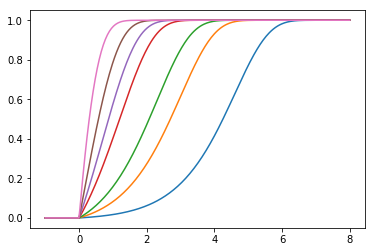

In [81]:
from scipy.stats import gompertz
cs = [0.01, 0.05, 0.1, 0.3, 0.5, 0.9, 1.99]
x = np.linspace(-1,8,300)
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_xlim(-0.05,6)
for c in cs:
    ax.plot(x,gompertz.cdf(x,c))



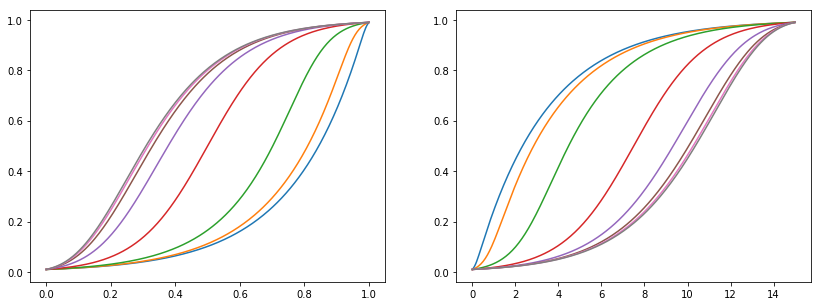

In [72]:
from scipy.stats import genlogistic
cs = [.03, 0.1, 0.3, 1, 3, 10, 30, 3000]
fig = plt.figure()
fig.set_size_inches(14,5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax.set_xlim(-0.05,6)
# for c in cs:
#     x = np.linspace(genlogistic.ppf(0.01,c),genlogistic.ppf(0.99,c),300)
#     scale = genlogistic.ppf(0.99,c)-genlogistic.ppf(0.01,c)
#     #loc = -genlogistic.ppf(0.5,c)
#     loc = genlogistic.ppf(0.01,c)
#     ax.plot((x-loc)/scale,genlogistic.cdf(x,c))
    
for c in cs:
    x = np.linspace(0,1,300)
    scale = genlogistic.ppf(0.99,c)-genlogistic.ppf(0.01,c)
    #loc = -genlogistic.ppf(0.5,c)
    loc = genlogistic.ppf(0.01,c)
    ax1.plot(x,genlogistic.cdf(x*scale,c,-loc))
    ax2.plot(x*15,1 - genlogistic.cdf((1-x)*scale,c,-loc))

In [80]:
#TEST ProbeBuilder
the_strings = ['this is probe number one',
               'this is probe number two',
               'this is probe number three',
               'the probe is number three on the register',
               'completely different probe from the rest']
the_matches = ['this is probe number', 'number three', 'probe']

cov_limits = [0.21,0.41,0.61,0.81]

for cl in cov_limits:
    rec1 = ProbeBuilder(the_matches[:-1],the_strings,cl)
    rec2 = ProbeBuilder(the_matches,the_strings,cl)
    print('cov_limit = {}; match_subset:'.format(cl))
    print(rec1.combos)
    print('cov_limit = {}; full_match:'.format(cl))
    print(rec2.combos)
    

cov_limit = 0.21; match_subset:
[(0.6, ['this is probe number']), (0.4, ['number three'])]
cov_limit = 0.21; full_match:
[(0.6, ['this is probe number']), (0.4, ['number three']), (1.0, ['probe'])]
cov_limit = 0.41; match_subset:
[(0.6, ['this is probe number'])]
cov_limit = 0.41; full_match:
[(0.6, ['this is probe number']), (1.0, ['number three', 'probe']), (1.0, ['probe'])]
cov_limit = 0.61; match_subset:
[(0.8, ['this is probe number', 'number three'])]
cov_limit = 0.61; full_match:
[(0.8, ['this is probe number', 'number three']), (1.0, ['number three', 'probe']), (1.0, ['probe'])]
cov_limit = 0.81; match_subset:
[]
cov_limit = 0.81; full_match:
[(1.0, ['number three', 'probe']), (1.0, ['probe'])]


In [29]:
docs_in_order = [raw_data[0]['Data'][i]['document_name'] for i in range(len(raw_data[0]['Data']))] 
docs_in_order

NameError: name 'raw_data' is not defined

In [143]:
# NLTK

with open('Revolving_Loan_cheatsheet.json') as jsonfile:
    raw_data = json.load(jsonfile)

doc_i = 1
filename = '../ING_POC/{}'.format(docs_in_order[doc_i])
with open(filename) as fin:
    text1 = fin.read()

tokenized_doc = pre_test(text1).split()    
all_probes = [pre_test(raw_data[0]['Data'][i]['document_answers'][0]['text']).split() 
              for i in range(len(raw_data[0]['Data'])) 
              if 'trainingset' in raw_data[0]['Data'][i]['document_name']]

min_match_len = 5
coverage_ratio_thres = .7

t1 = time.time()
all_matches = get_all_matches_from_list(all_probes)
t2 = time.time()
print('get_all_matches - {}s'.format(t2-t1) )
probe_set = ProbeBuilder(all_matches, all_probes, coverage_ratio_thres)
t3 = time.time()
print('ProbeBuilder - {}s'.format(t3-t2) )
print('number of subsets - {}'.format(len(probe_set.combos)))
final = calc_scores(final_probes=probe_set.combos, all_strings=all_probes)
ordered_indices = list(zip(*sorted([(v,i) for i,v in enumerate(final['final'])], reverse=True)))[1]
t4 = time.time()
print('select best probe - {}s'.format(t4-t3) )
    
tokenized_probes = final['match_list'][ordered_indices[0]]

print('PROBE LIST:')
for prb in tokenized_probes:
    print(prb)

x,y = list(zip(*max_probe_signal(tokenized_probes,tokenized_doc)))
t5 = time.time()
print('max_probe_signal - {}s'.format(t5-t4) )
plt.plot(x,y)

get_all_matches - 0.02519083023071289s
ProbeBuilder - 0.8690707683563232s
number of subsets - 925
select best probe - 0.9493408203125s
PROBE LIST:
['subject', 'term', 'agreement', 'lender', 'make', 'avail', 'borrow']
['subject', 'term', 'condit', 'set', 'forth', 'herein']
['subject', 'term', 'condit', 'hereof', 'lender']
['revolv', 'credit', 'facil', 'aggreg', 'amount']
['herein', 'set', 'forth', 'lender', 'agre']
peak score: 0.7589102823133795; and position: 7001
peak score: 0.3287681201816993; and position: 880
peak score: 0.3287681201816993; and position: 881
peak score: 0.7589102823133795; and position: 1355
peak score: 0.5591311723379774; and position: 3334
max_probe_signal - 11.237496376037598s


In [46]:
start = 4480
' '.join(tokenized_doc[start:start+40])

'base currenc revolv credit facil aggreg amount equal total capex facil commit capabl reborrow contempl agreement iii base currenc work capit facil aggreg amount equal total wc facil commit capabl reborrow contempl agreement iv base currenc overdraft facil amount equal'

In [121]:
# use SPACY instead of NLTK

True

In [ ]:
[('29_Seawell_evaluationset.txt', (1,1)),
 ('03_SNC_trainingset.txt',(1,3)),
 ('06_Caruna_trainingset.txt',(1,1)),
 ('13_GFI_trainingset.txt',(1,1)),
 ('20_Nordural_trainingset.txt',(1,3)),
 ('22_Zynga_evaluationset.txt',(1,3)),
 ('11_Teva_trainingset.txt',(1,1)),
 ('12_ellevio_trainingset.txt',(1,1)),
 ('15_Harmony_trainingset.txt',(1,1)),
 ('05_JLL_trainingset.txt',(1,1)),
 ('19_Ixeurope_trainingset.txt',(1,1)),
 ('30_Staples_evaluationset.txt',(1,3)),
 ('10_Clarcor_trainingset.txt',(1,3)),
 ('18_Interxion_trainingset.txt',(1,1)),
 ('23_Marina_evaluationset.txt',(1,4)),
 ('25_Nomad__evaluationset.txt',(1,2)),
 ('08_Chain_trainingset.txt',(1,1)),
 ('16_CHOICE_trainingset.txt',(1,5)),
 ('14_CHRYSLER_trainingset.txt',(1,4)),
 ('01_JCP_trainingset.txt',(1,6)),
 ('21_B&N_evaluationset.txt',(1,3)),
 ('04_Unitymedia_trainingset.txt',(1,1)),
 ('26_TIME_evaluationset.txt',(1,4)),
 ('17_CDW_trainingset.txt',(1,9)),
 ('24_Wireco_evaluationset.txt',(0,2)),
 ('02_Tronox_trainingset.txt',(0,3)),
 ('07_OPT1_trainingset.txt',(1,19))]

In [2]:
with open('Revolving_Loan_cheatsheet.json') as jsonfile:
    raw_data = json.load(jsonfile)

# prepare probes
all_probes = [probe_tokenization(raw_data[0]['Data'][i]['document_answers'][0]['text'],spacy_model) 
              for i in range(len(raw_data[0]['Data'])) 
              if 'trainingset' in raw_data[0]['Data'][i]['document_name']]

min_match_len = 4
coverage_ratio_thres = .8
lc_ratio = 1.5

print('probe parameters: min_len={}; min_coverage={}; length_to_coverage_weight_ratio={}'
      .format(min_match_len,coverage_ratio_thres,lc_ratio))

t1 = time.time()
all_matches = get_all_matches_from_list(all_probes,min_match_len)
t2 = time.time()
print('get_all_matches - {}s'.format(t2-t1) )
probe_set = ProbeBuilder(all_matches, all_probes, coverage_ratio_thres)
t3 = time.time()
print('ProbeBuilder - {}s'.format(t3-t2) )
print('number of subsets - {}'.format(len(probe_set.combos)))
final = calc_scores(final_probes=probe_set.combos, all_strings=all_probes, l_c_ratio=lc_ratio)
ordered_indices = list(zip(*sorted([(v,i) for i,v in enumerate(final['final'])], reverse=True)))[1]
t4 = time.time()
print('select best probe - {}s'.format(t4-t3) )
    
tokenized_probes = final['match_list'][ordered_indices[0]]

print('PROBE LIST:')
for prb in tokenized_probes:
    print(prb)

probe parameters: min_len=4; min_coverage=0.8; length_to_coverage_weight_ratio=1.5
get_all_matches - 0.01942896842956543s
ProbeBuilder - 17.34021282196045s
number of subsets - 4425
select best probe - 4.296913146972656s
PROBE LIST:
['base', 'currency', 'revolve', 'credit', 'facility', 'aggregate', 'equal', 'total', 'capex', 'facility', 'commitments', 'capable', 'reborrow', 'contemplate', 'agreement']
['borrower', 'multicurrency', 'revolving', 'credit', 'facility', 'aggregate']
['subject', 'term', 'agreement', 'lender', 'available']
['subject', 'term', 'condition', 'hereof', 'lender']
['subject', 'term', 'condition', 'set', 'forth']
['time', 'time', 'closing', 'date']


In [28]:
# prepare file
doc_i = 0
print(docs_in_order[doc_i])
filename = '../ING_POC/{}'.format(docs_in_order[doc_i])
with open(filename) as fin:
    text1 = fin.read()
    
spacied_doc = spacy_model(text1) 
tokenized_doc_indices = [tk.i for tk in spacied_doc if not (tk.is_stop or tk.is_punct or tk.is_space)]
tokenized_doc = [spacied_doc[i].lemma_.lower() for i in tokenized_doc_indices]

NameError: name 'docs_in_order' is not defined

peak score: 0.5591311723379774; and position: 494 of probe: base currency revolve credit facility aggregate equal total capex facility commitments capable reborrow contemplate agreement
peak score: 0.896684887836389; and position: 3632 of probe: borrower multicurrency revolving credit facility aggregate
peak score: 1.0608907864959045; and position: 3627 of probe: subject term agreement lender available
peak score: 0.5591311723379774; and position: 3624 of probe: subject term condition hereof lender
peak score: 0.5591311723379774; and position: 3624 of probe: subject term condition set forth
peak score: 0.5591311723379774; and position: 2584 of probe: time time closing date
max_probe_signal - 66.19070768356323s


<IPython.core.display.Javascript object>


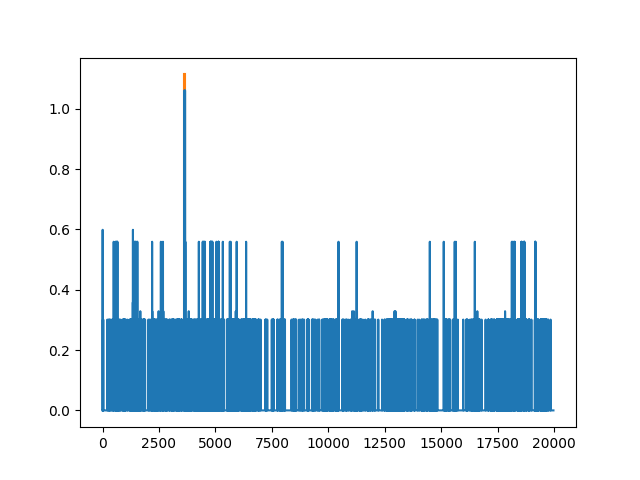

In [5]:
# apply probes to file

x,y = list(zip(*max_probe_signal(tokenized_probes,tokenized_doc)))
t5 = time.time()
print('max_probe_signal - {}s'.format(t5-t4) )
fig, ax = plt.subplots(1,1)
ax.plot(x,y)

# Get True Answer
ans_start = raw_data[1]['Data'][doc_i]['document_answers'][0]['start']
ans_end = raw_data[1]['Data'][doc_i]['document_answers'][-1]['end']
get_start = True
for i,tok in enumerate(tokenized_doc_indices):
    if get_start and spacied_doc[tok].idx > ans_start:
        start_tok = max(i-1,0)
        get_start = False
    if (not get_start) and spacied_doc[tok].idx + len(spacied_doc[tok].text_with_ws) >= ans_end:
        end_tok = i
        break
ymax = ax.get_ylim()[1]
ax.plot([start_tok,start_tok],[0,ymax], c='#ff7f0e', zorder=0)
ax.plot([end_tok,end_tok],[0,ymax], c='#ff7f0e', zorder=0)

In [280]:
top_hits = []
top_val = 0
for i,(yi,xi) in enumerate(sorted(zip(y,x), reverse=True)):
    if not i:
        top_val = yi
        top_hits.append(xi)
    elif yi == top_val:
        top_hits.append(xi)
    else:
        break
peaks_in_ans = sum([start_tok < i < end_tok for i in top_hits])
peaks_total = len(top_hits)
print(top_hits)

[73250, 61205, 41973, 39376, 39319, 38999, 38935, 38674, 36962, 36709, 36484, 36109, 33478, 30228, 22643, 21229, 21226, 8586, 2514, 1291]


In [281]:
# output ((min_len,min_cov,l_c_ratio),(file_id,(peak_in_ans,n_peaks_tot)))

min_lens = [4,5,6,7]
min_covs = [0.6,0.7,0.8]
l_c_ratios = [1.5,2.3]


4


In [209]:
# print text in found match
peak_id = 3626
prb_id = 2
start = tokenized_doc_indices[peak_id]
end = tokenized_doc_indices[peak_id + len(tokenized_probes[prb_id])]
for i in range(start-50,end+10):
    print(spacied_doc[i].text,end=spacied_doc[i].whitespace_)
print('\n',spacied_doc[start].idx,' ',spacied_doc[end].idx+len(spacied_doc[end].text_with_ws))

Finance Document has the same meaning in that Finance Document or notice as in this Agreement.
(d) A Default or an Event of Default is “continuing” if it has not been remedied or waived.
2	THE FACILITIES
2.1	The Facilities
(a) Subject to the terms of this Agreement, the Lenders make available to the Borrowers:
(i) a 
 40867   40949


In [133]:
sorted(list(zip(y,x)), reverse=True)[:100]

[(1.9574827126030883, 3735),
 (1.8864780870879592, 3736),
 (1.8864780870879592, 3734),
 (1.8131684483868686, 3737),
 (1.8131684483868686, 3733),
 (1.7371517376798464, 3738),
 (1.7371517376798464, 3732),
 (1.6579268876360236, 3739),
 (1.6579268876360236, 3731),
 (1.5748593250841159, 3740),
 (1.5748593250841159, 3730),
 (1.4871301561678667, 3741),
 (1.4871301561678667, 3729),
 (1.3936589305860745, 3742),
 (1.3936589305860745, 3728),
 (1.3898907379561516, 3755),
 (1.3898907379561516, 3751),
 (1.340097336882672, 3754),
 (1.3348712679243748, 3752),
 (1.3226136395293726, 3756),
 (1.307422653636322, 3750),
 (1.2929818862519795, 3743),
 (1.2929818862519795, 3727),
 (1.279810036577694, 3753),
 (1.2537418689014659, 3771),
 (1.2537418689014659, 3757),
 (1.2205321165048302, 3749),
 (1.1898487653196155, 3770),
 (1.1830516432517797, 3774),
 (1.1830516432517797, 3772),
 (1.1830516432517797, 3760),
 (1.1830516432517797, 3758),
 (1.1830516432517797, 3744),
 (1.1830516432517797, 3726),
 (1.1282521887382

In [265]:
# print text in true answer
for i in range(tokenized_doc_indices[start_tok],tokenized_doc_indices[end_tok]+150):
    print(spacied_doc[i].text,end=spacied_doc[i].whitespace_)
print('\n',spacied_doc[start_tok].idx,' ',spacied_doc[end].idx+len(spacied_doc[end_tok].text_with_ws))

Credits
SECTION 2.01. Commitments.
(a) Subject to the terms and conditions set forth herein, each Revolving Lender severally
agrees to make Revolving Loans to the Borrowers from time to time during the Availability Period in an aggregate principal amount that will not result in (i) such Lender’s Revolving Credit Exposure exceeding such Revolving Lender’s Revolving Commitment or (ii) the sum of the total Revolving Credit Exposures exceeding the Revolving Credit Line Cap. Within the foregoing limits and subject to the terms and conditions set forth herein, the Borrowers may borrow, prepay and reborrow Revolving Loans.
(b) Subject to the terms and conditions set forth herein, each Term Lender severally agrees
to make its Term Loan to the Borrowers on the Closing Date in a principal amount not to exceed the Term
Commitment of such Term Lender. Amounts repaid in respect of the Term Loan may not be reborrowed. Upon each Term Lender’s making of its Term Loan, the Term Commitment of such Term 

In [ ]:
# Bag of Words for ING

In [31]:
import sys
import os
import re
import json
from collections import defaultdict
# substitute your path to eigen
exe_dir = '/home/petar.petrov/Desktop/Project_Beaker_PoC/Revolving_Loan_Analysis/'
maindir = '/home/petar.petrov/eigen/'
sys.path.append(maindir)
os.chdir(maindir)
os.environ["DJANGO_SETTINGS_MODULE"] = "eigenapp.settings"
import django
django.setup()
    
import en_core_web_sm
spacy_model = en_core_web_sm.load()

from common.lib.predictive_pipeline.feature_extractors.clause_filter_feature_extractor import \
    ClauseFilterFeatureExtractor
from common.lib.predictive_pipeline.feature_extractors.clause_filter_params import \
    ClauseFilterParams
from common.lib.predictive_pipeline.feature_extractors.clause_filter_algorithms import\
    BoWFilter
from common.lib.predictive_pipeline.pipeline_document import PipelineDocument
from common.lib.predictive_pipeline.pipelines.default_params import default_replacers
from common.lib.predictive_pipeline.pipelines.pipeline_params import PipelineParams
from common.lib.predictive_pipeline.predictor import Predictor
from common.lib.sectioning.DataStructure import Range
from common.lib.sectioning.Document import Document


def get_ordered_files():
    with open(exe_dir + 'Revolving_Loan_cheatsheet.json') as jsonfile:
        raw_data = json.load(jsonfile)
    docs_in_order = [raw_data[0]['Data'][i]['document_name'] for i in range(len(raw_data[0]['Data']))] 
    return docs_in_order

def make_data():
    with open(exe_dir + 'Revolving_Loan_cheatsheet.json') as jsonfile:
        raw_data = json.load(jsonfile)
    
    data_dir = os.path.join(exe_dir,
                            '../ING_POC/')
    
    train = [{'doc':data_dir + the_doc['document_name'], 
              'clause':(the_doc['document_answers'][0]['start'],
                        the_doc['document_answers'][0]['end'],
                        the_doc['document_answers'][0]['text']),
              'class':'Yes', 'id':idx} for idx,the_doc in enumerate(raw_data[0]['Data']) 
                             if 'trainingset' in the_doc['document_name']]
    test = [{'doc':data_dir + the_doc['document_name'], 
              'clause':(the_doc['document_answers'][0]['start'],
                        the_doc['document_answers'][0]['end'],
                        the_doc['document_answers'][0]['text']),
              'class':'Yes', 'id':idx} for idx,the_doc in enumerate(raw_data[0]['Data']) 
                             if 'evaluationset' in the_doc['document_name']]

    return {'train': train,
            'test':  test,
           }

def make_data_with_multiple_answers():
    with open(exe_dir + 'Revolving_Loan_cheatsheet.json') as jsonfile:
        raw_data = json.load(jsonfile)
    
    data_dir = os.path.join(exe_dir,
                            '../ING_POC/')
    
    train = [{'doc':data_dir + the_doc['document_name'], 
              'clause':[(ans['start'],ans['end'],ans['text']) for ans in the_doc['document_answers']],
              'class':'Yes', 'id':idx} for idx,the_doc in enumerate(raw_data[0]['Data']) 
                             if 'trainingset' in the_doc['document_name']]
    test = [{'doc':data_dir + the_doc['document_name'], 
              'clause':[(ans['start'],ans['end'],ans['text']) for ans in the_doc['document_answers']],
              'class':'Yes', 'id':idx} for idx,the_doc in enumerate(raw_data[0]['Data']) 
                             if 'evaluationset' in the_doc['document_name']]

    return {'train': train,
            'test':  test,
           }


def ntfr_word_score(term_freq_df, term_freq_in_doc_df, element_freq_df,
                    normalisation_df):
    """
    ntf - normalise the entries of filt.tf to the length of the
          corresponding relevant text
    ntfd - normalise the entries of filt.tfd to the lenght of the
           corresponding document text
    The final score is an element-wise ratio between the two
    and then summed over the rows (files)
    """
    n_best = -1
    ntf = term_freq_df.apply(lambda row: row/normalisation_df['sec_len'])
    ntfd = term_freq_in_doc_df.apply(lambda row: row/normalisation_df['doc_len'])
    ntfr = ntf/ntfd
    return (ntfr.fillna(0).apply(sum)/
           ntfr.notnull().aggregate(any, axis=1).sum())\
           .sort_values(ascending=False)[:n_best].to_dict()

def bm25_sec_score(tokenised_elements, word_scores, term_freq_df,
                   term_freq_in_doc_df, element_freq_df, normalisation_df,
                   k1=1.75, b=0.75, delta=1):
    """
        BM25
    """
    rtn = 0.
    average_section_len = normalisation_df['sec_len'].mean()
    norm_doc_length = len(tokenised_elements)/average_section_len
    new_term_freq_dict = defaultdict(int)
    for token in tokenised_elements:
        if token in word_scores:
            new_term_freq_dict[token] += 1
    for token, freq in new_term_freq_dict.items():
        den = element_freq_df.notnull().aggregate(any,axis=1).sum()
        num = element_freq_df.sum()[token]
        idf = den/num
        rtn += (freq*(k1+1)/(freq + k1*(1-b+b*norm_doc_length)) + delta)*idf
    return rtn


def make_predictor():
    
    bm25_filter_params = ClauseFilterParams(word_scorer=ntfr_word_score,
                                            section_scorer=bm25_sec_score,
                                            section_scorer_params={
                                          'k1': 1.75, 'b': 0.75,
                                          'delta': 1},
                                            vocab_ngram_range=(3,3),
                                            no_filter_elements=1,
                                            skip_filter=False)
    simple_cv_params = None

    filtered_standard_classifier_pipeline_params = PipelineParams(
        replacers=default_replacers,
        classifier='MNB',
        feature_extractor=ClauseFilterFeatureExtractor,
        feature_params={
            'filter_params': bm25_filter_params,
            'vect_params': simple_cv_params},
        attrs_to_pickle =['classifier', 'feature_extractor'])

    return Predictor(**filtered_standard_classifier_pipeline_params._asdict())


def prepare_docs(raw_docs):
    """
    Similar to the way self.docs is constructed in Statistician.load_data
    with some minor difference

    rtn = {i:element for i in range(len(raw_docs))}
    element = {'document':pipelineDocument(i,sectioning_doc),
               'training_data':{'StartPos':startpos, 'EndPos':endpos, 'text':'Yes'/'No'}
    
    for each file:
        make pipeline_doc,
        get range from text of clause
        add the class as the value to the 'text' key
        
    """
    rtn = []
    for datum in raw_docs:
        secdoc = Document.fromFile(datum['doc'])
        element = {}
        element['document'] = PipelineDocument(datum['id'], secdoc)
        # element['training_data'] can have multiple ranges if the answer
        # spans more than one consecutive sections. Here it is only one. 
        if datum['clause']:
            rng = secdoc.rangeFromText(datum['clause'][2])
            if not rng:
                rng = Range(secdoc.posFromTextOffset(datum['clause'][0]),
                            secdoc.posFromTextOffset(datum['clause'][1]))
            print(rng)
            element['training_data'] = [rng.toJson()]
            element['training_data'][0]['text'] = datum['class']
        else:
            element['training_data'] = [{'text': datum['class']}]
        rtn.append(element)
    return rtn

def prepare_docs_with_multiple_answers(raw_docs):
    """
    Similar to the way self.docs is constructed in Statistician.load_data
    with some minor difference

    rtn = {i:element for i in range(len(raw_docs))}
    element = {'document':pipelineDocument(i,sectioning_doc),
               'training_data':{'StartPos':startpos, 'EndPos':endpos, 'text':'Yes'/'No'}
    
    for each file:
        make pipeline_doc,
        get range from text of clause
        add the class as the value to the 'text' key
        
    """
    rtn = []
    for datum in raw_docs:
        secdoc = Document.fromFile(datum['doc'])
        element = {}
        element['training_data'] = []
        element['document'] = PipelineDocument(datum['id'], secdoc)
        # element['training_data'] can have multiple ranges if the answer
        # spans more than one consecutive sections. Here it is only one. 
        if datum['clause']:
            for chunk in datum['clause']:
                rng = secdoc.rangeFromText(chunk[2])
                if not rng:
                    rng = Range(secdoc.posFromTextOffset(chunk[0]),
                                secdoc.posFromTextOffset(chunk[1]))
                element['training_data'] += [rng.toJson()]
                element['training_data'][-1]['text'] = datum['class']
        else:
            element['training_data'] += [{'text': datum['class']}]
        rtn.append(element)
    return rtn



'/home/petar.petrov/eigen'

In [2]:
data = make_data_with_multiple_answers()
train_text = prepare_docs_with_multiple_answers(data['train'])
docs_to_train = [doc['document'] for doc in train_text]
answers = {doc['document'].id: doc['training_data'] for doc in train_text}
# linking files to spacy model and answers
predictor = make_predictor()
predictor.preprocess_docs(docs_to_train,spacy_model)
predictor.populate_answer_locations_for_docs(docs_to_train,answers)
params = {'pipeline_docs':docs_to_train}
my_filter = BoWFilter(predictor.feature_params['filter_params'])
print('start fitting the vocabulary...',end='\r')
my_filter.fit(params)
# At this point there is access to the trained predictor and all its nested elements
print('',end='\r')
print('vocabulary is ready!')
my_filter.word_scores

vocabulary is ready!cabulary...


{'accord term agreement': 6.4534113060428853,
 'accord term section': 38.692105263157892,
 'agent revolv lender': 24.200292397660821,
 'aggreg base currenc': 106.80523423944477,
 'aggreg equal total': 408.54028468607413,
 'aggreg exceed time': 32.23391812865497,
 'aggreg outstand origin': 19.925320056899004,
 'aggreg princip exceed': 71.502024291497989,
 'aggreg princip result': 14.805263157894737,
 'agre avail borrow': 82.692982456140342,
 'agre loan commit': 71.502024291497989,
 'agre loan loan': 104.31847637110796,
 'agre rate specifi': 32.267056530214425,
 'agre revolv loan': 664.18228844169255,
 'agre sever joint': 78.845029239766092,
 'agre tranch loan': 14.805263157894737,
 'agreement bank agre': 71.502024291497989,
 'agreement borrow shall': 48.400584795321642,
 'agreement capex multi': 0.0,
 'agreement lender avail': 360.86409774436089,
 'agreement relianc represent': 38.692105263157892,
 'altern currenc aggreg': 39.850640113798008,
 'altern currenc time': 64.467836257309941,


In [45]:
# data = make_data()
# predictor = make_predictor()

# train_text = prepare_docs(data['train'])
# docs_to_train = [doc['document'] for doc in train_text]
# answers = {doc['document'].id: doc['training_data'] for doc in train_text}
# # linking files to spacy model and answers
# predictor.preprocess_docs(docs_to_train,spacy_model)
# predictor.populate_answer_locations_for_docs(docs_to_train,answers)
# params = {'pipeline_docs':docs_to_train}
my_filter = BoWFilter(predictor.feature_params['filter_params'])
print('start fitting the vocabulary...',end='\r')
my_filter.fit(params)
# At this point there is access to the trained predictor and all its nested elements
print('',end='\r')
print('vocabulary is ready!')
test_text = prepare_docs(data['test'])


# # Here, we access the already trained filter from the predictor and apply it to a new file
# filename = data['test'][0]['document']
# doc = Document.fromFile(filename)
# docs = [PipelineDocument(1, doc)]
# predictor.preprocess_docs(docs,spacy_model)

# # ranks all text elements according to the section scoring function
# ranked_text = tester.predictor.feature_extractor.filter.rank_all_chunks(docs[0])
# # does the same as the line above but also picks the best chunk of text and returns it
# filt_text = tester.predictor.feature_extractor.filter.transform({'pipeline_docs': docs})

# This is how you access the trained vocabulary with scores (the query)
my_filter.word_scores

vocabulary is ready!cabulary...
(<Index: 374; Offset: 0>:<Index: 374; Offset: 104>)
(<Index: 24; Offset: 38>:<Index: 24; Offset: 597>)
(<Index: 126; Offset: 3519>:<Index: 126; Offset: 3776>)
(<Index: 900; Offset: 0>:<Index: 900; Offset: 167>)
(<Index: 1041; Offset: 0>:<Index: 1041; Offset: 184>)
(<Index: 613; Offset: 31>:<Index: 613; Offset: 252>)
(<Index: 364; Offset: 33>:<Index: 364; Offset: 474>)
(<Index: 545; Offset: 0>:<Index: 545; Offset: 225>)


{'accordance': 1.7158796962726437,
 'agent': 0.068265987017378904,
 'aggregate': 24.710070394672687,
 'agree': 11.704271299870607,
 'agreement': 2.5431363602489321,
 'alternative': 2.0288166067538529,
 'applicable': 0.88975526449210651,
 'australian': 0.37906264057579842,
 'availability': 23.711468467392045,
 'available': 8.6866949999747991,
 'banks': 0.65001840264998167,
 'base': 6.017781556023162,
 'basis': 1.5327169274537698,
 'borrower': 4.5400710663223434,
 'borrowers': 172.05877299673332,
 'business': 1.020584623469756,
 'capable': 23.812249373433581,
 'capex': 2.0150601503759398,
 'case': 0.26107625576081483,
 'closing': 2.4056599832915619,
 'collectively': 5.6929485876854296,
 'commit': 82.338345864661648,
 'commitment': 10.606308895855642,
 'commitments': 10.923012051747147,
 'committed': 0.60250314259168158,
 'condition': 9.7054673967517076,
 'confirm': 4.4000531632110578,
 'contemplate': 11.591027046783626,
 'credit': 11.089762403134714,
 'currencies': 32.23391812865497,
 'c

In [32]:
with open(exe_dir + 'Revolving_Loan_cheatsheet.json') as jsonfile:
    raw_data = json.load(jsonfile)
for pipdoc in docs_to_train:
    print('FILE: ',pipdoc.sectioning_doc._fileName.split('/')[-1],'\n',
          pipdoc.sectioning_doc.getTextInRange(pipdoc.answer_ranges[0].start(),
                                               pipdoc.answer_ranges[0].end()),
          '\nTRUTH: ',raw_data[0]['Data'][pipdoc.id]['document_name'],
          '\n',raw_data[0]['Data'][pipdoc.id]['document_answers'][0]['text'],
          '\n\nNEXT FILE')

FILE:  03_SNC_trainingset.txt 
 The Lenders, individually, and not solidarily (and not jointly and severally), agree to make available to the Borrowers a revolving credit facility (the “Revolving Facility”). 
TRUTH:  03_SNC_trainingset.txt 
 The Lenders, individually, and not solidarily (and not jointly and severally), agree to make available to the Borrowers a revolving credit facility (the “Revolving Facility”). 

NEXT FILE
FILE:  06_Caruna_trainingset.txt 
 a Base Currency revolving credit facility in an aggregate amount equal to the Total Capex Facility Commitments capable of being reborrowed as contemplated by this Agreement; 
TRUTH:  06_Caruna_trainingset.txt 
 a Base Currency revolving credit facility in an aggregate amount equal to the Total Capex Facility Commitments capable of being reborrowed as contemplated by this Agreement; 

NEXT FILE
FILE:  13_GFI_trainingset.txt 
 Subject to the terms of this Agreement, the Lenders make available to the Borrower a dollar revolving loan

In [33]:
ordered_words = {v:(i,k) for i,(k,v) in enumerate(sorted([(v,k) for k,v in my_filter.word_scores.items()],reverse=True))}
bow_vocab = {v:k for k,v in sorted([(v,k) for k,v in my_filter.word_scores.items()],reverse=True)[:10]}
bow_vocab

{'aggreg equal total': 408.54028468607413,
 'agre revolv loan': 664.18228844169255,
 'agreement lender avail': 360.86409774436089,
 'borrow multicurr revolv': 417.2440717177559,
 'credit facil aggreg': 674.37903412377102,
 'facil aggreg equal': 353.25607415975838,
 'forth lender agre': 336.62046783625732,
 'lender agre revolv': 420.21293859649126,
 'lender avail borrow': 394.8124060150376,
 'set forth lender': 401.08830409356727}

In [27]:
import json
with open('ranked_vocab_dict_bigram.json','w') as f:
    json.dump(ordered_words,f)

In [43]:
##########################
## ALP score calculation
##########################
def bow_similarity(vocab, window, compare, ngram = 1):
    max_score = 0
    max_idx = -1
    assert window <= len(compare)
    rtn = []
    can_print = False
    window_score = 0
    for i in range(len(compare)-window + 1):
#         print(i)
        if can_print and int(float(i)/(len(compare)-window)*100)%10 == 0:
            can_print = False
            print('Progress: {}%'.format(int(float(i)/(len(compare)-window)*100)), end='\r')
        elif not can_print and int(float(i)/(len(compare)-window)*100)%10 == 1:
            can_print = True
        if not i:
            window_score = sum([vocab[' '.join([compare[w+ii] for ii in range(ngram)])] 
                                for w in range(window-ngram+1) 
                                if ' '.join([compare[w+ii] for ii in range(ngram)]) in vocab])
#             print([[w+ii for ii in range(ngram)] for w in range(window-ngram+1)])
        else:
            ngram_in = ' '.join([compare[i+window-ii] for ii in range(ngram,0,-1)])
            ngram_out = ' '.join([compare[i+ii-1] for ii in range(ngram)])
#             print([i+window-ii for ii in range(ngram,0,-1)], ngram_in, 
#                   [i+ii-1 for ii in range(ngram)], ngram_out)
            change = (vocab[ngram_in] if ngram_in in vocab else 0) - \
                     (vocab[ngram_out] if ngram_out in vocab else 0)
            window_score += change
        rtn.append(window_score)
        if rtn[-1] > max_score:
            max_idx = i
            max_score = rtn[-1]
    print('peak score: {}; and position: {} of top {} words'.format(max_score,max_idx, len(vocab)))
    return list(enumerate(rtn))


In [15]:
# TEST bow_similarity
from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()
test_text = ('This fake sentence should find a peak. Therefore I need to use words like borrowing multicurrency revolving credit and mention something about currencies. Otherwise there will not be any points, which is not outstanding')
spacied_doc = spacy_model(test_text) 
tokenized_doc_indices = [tk.i for tk in spacied_doc if not (tk.is_stop or tk.is_punct or tk.is_space)]
tokenized_doc = [stemmer.stem(spacied_doc[i].lemma_) for i in tokenized_doc_indices]
print('total length ',len(tokenized_doc))
print(bow_similarity(bow_vocab, 4 ,tokenized_doc,3))
print('  '.join(tokenized_doc))


total length  16
0
[[0, 1, 2], [1, 2, 3]]
1
[2, 3, 4] find peak ne [0, 1, 2] fake sentenc find
2
[3, 4, 5] peak ne use [1, 2, 3] sentenc find peak
3
[4, 5, 6] ne use word [2, 3, 4] find peak ne
4
[5, 6, 7] use word like [3, 4, 5] peak ne use
5
[6, 7, 8] word like borrow [4, 5, 6] ne use word
6
[7, 8, 9] like borrow multicurr [5, 6, 7] use word like
7
[8, 9, 10] borrow multicurr revolv [6, 7, 8] word like borrow
8
[9, 10, 11] multicurr revolv credit [7, 8, 9] like borrow multicurr
9
[10, 11, 12] revolv credit mention [8, 9, 10] borrow multicurr revolv
10
[11, 12, 13] credit mention currenc [9, 10, 11] multicurr revolv credit
11
[12, 13, 14] mention currenc point [10, 11, 12] revolv credit mention
12
[13, 14, 15] currenc point outstand [11, 12, 13] credit mention currenc
peak score: 417.2440717177559; and position: 7 of top 10 words
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 417.2440717177559), (8, 417.2440717177559), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0)]
fake  sen

In [32]:
bow_vocab

{'agre revolv': 664.18228844169255,
 'avail borrow': 242.51478696741853,
 'borrow multicurr': 330.08010410641987,
 'equal total': 441.60094997108155,
 'facil aggreg': 334.72108101450203,
 'forth lender': 401.08830409356727,
 'forth revolv': 243.96934984520124,
 'multicurr revolv': 333.11374590321958,
 'period aggreg': 217.57318541451673,
 'revolv credit': 272.71554437183852}

In [35]:
with open(exe_dir + 'Revolving_Loan_cheatsheet.json') as jsonfile:
        raw_data = json.load(jsonfile)
docs_in_order = get_ordered_files()

In [47]:
# prepare file

doc_i = 0
print(docs_in_order[doc_i])
filename = exe_dir + '../ING_POC/{}'.format(docs_in_order[doc_i])
with open(filename) as fin:
    text1 = fin.read()
    
spacied_doc = spacy_model(text1) 
tokenized_doc_indices = [tk.i for tk in spacied_doc if not (tk.is_stop or tk.is_punct or tk.is_space)]
tokenized_doc = [stemmer.stem(spacied_doc[i].lemma_) for i in tokenized_doc_indices]

29_Seawell_evaluationset.txt


peak score: 2335.6491954244584; and position: 3630 of top 10 words


<IPython.core.display.Javascript object>


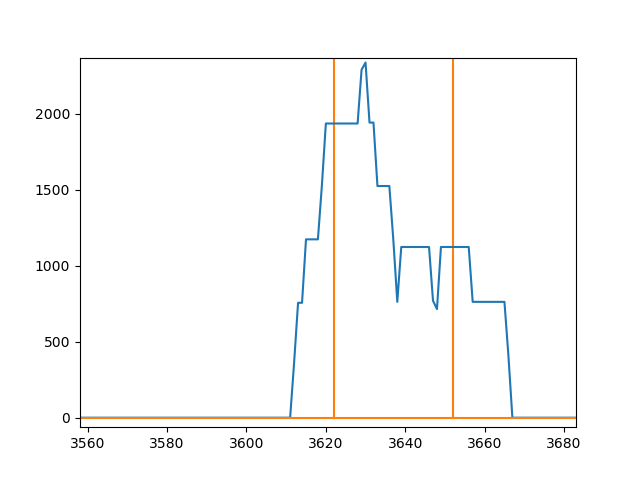

In [48]:
# apply sliding BoW to file
import matplotlib.pyplot as plt
%matplotlib notebook

x,y = list(zip(*bow_similarity(bow_vocab, 20 ,tokenized_doc,3)))
fig, ax = plt.subplots(1,1)
ax.plot(x,y)

# Get True Answer
ans_start = raw_data[1]['Data'][doc_i]['document_answers'][0]['start']
ans_end = raw_data[1]['Data'][doc_i]['document_answers'][-1]['end']
get_start = True
for i,tok in enumerate(tokenized_doc_indices):
    if get_start and spacied_doc[tok].idx > ans_start:
        start_tok = max(i-1,0)
        get_start = False
    if (not get_start) and spacied_doc[tok].idx + len(spacied_doc[tok].text_with_ws) >= ans_end:
        end_tok = i
        break
ymax = ax.get_ylim()[1]
ax.plot([start_tok,start_tok],[0,ymax], c='#ff7f0e', zorder=0)
ax.plot([end_tok,end_tok],[0,ymax], c='#ff7f0e', zorder=0)

In [54]:
signal_raw_text = np.interp(range(len(spacied_doc)), tokenized_doc_indices[:-19], y)
ax.plot(signal_raw_text)

<IPython.core.display.Javascript object>


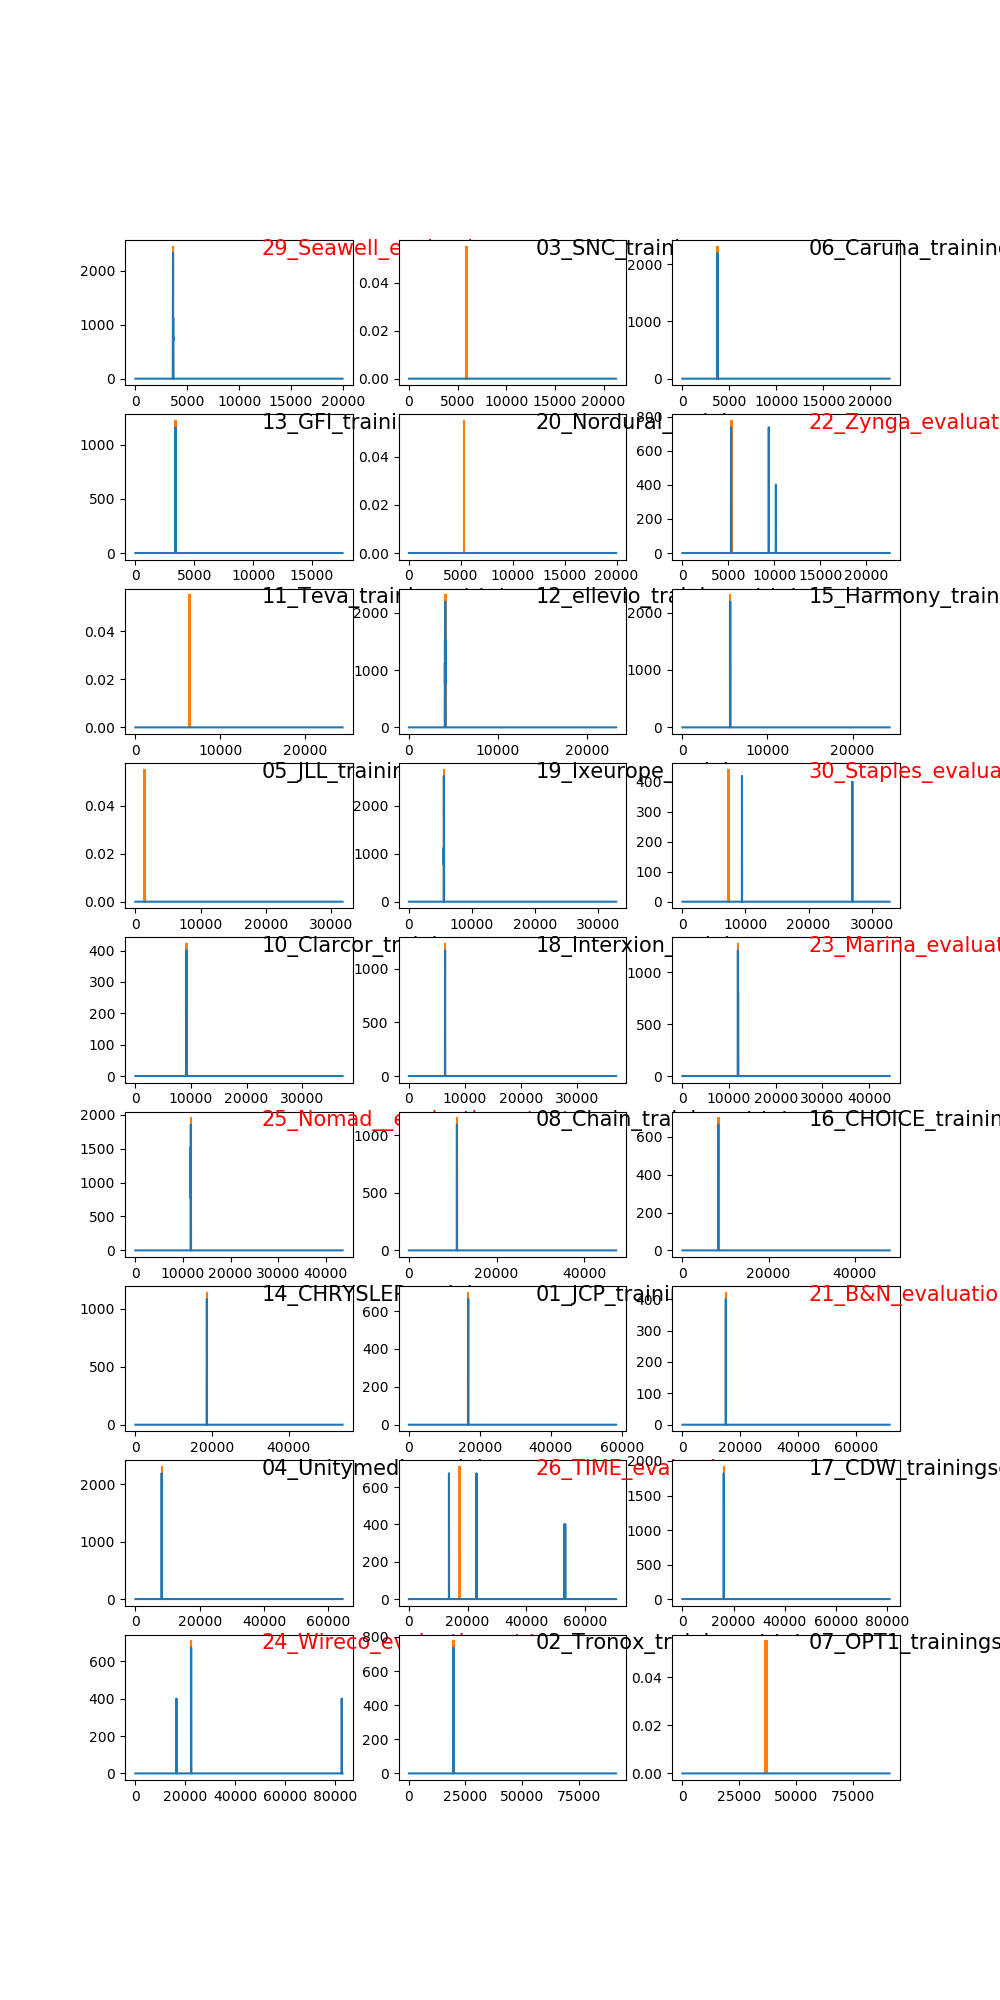

peak score: 2335.6491954244584; and position: 3630 of top 10 words
peak score: 0; and position: -1 of top 10 words
peak score: 2197.971751815436; and position: 3723 of top 10 words
peak score: 1164.2167884454725; and position: 3407 of top 10 words
peak score: 0; and position: -1 of top 10 words
peak score: 737.7087719298246; and position: 5280 of top 10 words
peak score: 0; and position: -1 of top 10 words
peak score: 2197.971751815436; and position: 4086 of top 10 words
peak score: 2191.851896729002; and position: 5613 of top 10 words
peak score: 0; and position: -1 of top 10 words
peak score: 2615.215823533192; and position: 5549 of top 10 words
peak score: 420.21293859649126; and position: 9427 of top 10 words
peak score: 401.0883040935673; and position: 9176 of top 10 words
peak score: 1172.9205754771542; and position: 6455 of top 10 words
peak score: 1211.8929753871857; and position: 11882 of top 10 words
peak score: 1853.4194646873593; and position: 11649 of top 10 words
peak sco

In [45]:
fig, axs = plt.subplots(9,3)
fig.set_size_inches(10,20)
doc_i = -1
for row in range(9):
    for col in range(3):
        ax = axs[row][col]
        doc_i += 1
        #print(docs_in_order[doc_i])
        filename = exe_dir + '../ING_POC/{}'.format(docs_in_order[doc_i])
        text_color = 'red' if 'evaluationset' in docs_in_order[doc_i] else 'black'
        with open(filename) as fin:
            text1 = fin.read()

        spacied_doc = spacy_model(text1) 
        tokenized_doc_indices = [tk.i for tk in spacied_doc if not (tk.is_stop or tk.is_punct or tk.is_space)]
        tokenized_doc = [stemmer.stem(spacied_doc[i].lemma_) for i in tokenized_doc_indices]

        x,y = list(zip(*bow_similarity(bow_vocab, 20 ,tokenized_doc,3)))
        ax.plot(x,y)

        # Get True Answer
        ans_start = raw_data[1]['Data'][doc_i]['document_answers'][0]['start']
        ans_end = raw_data[1]['Data'][doc_i]['document_answers'][-1]['end']
        get_start = True
        for i,tok in enumerate(tokenized_doc_indices):
            if get_start and spacied_doc[tok].idx > ans_start:
                start_tok = max(i-1,0)
                get_start = False
            if (not get_start) and spacied_doc[tok].idx + len(spacied_doc[tok].text_with_ws) >= ans_end:
                end_tok = i
                break
        ymax = ax.get_ylim()[1]
        ax.plot([start_tok,start_tok],[0,ymax], c='#ff7f0e', zorder=0)
        ax.plot([end_tok,end_tok],[0,ymax], c='#ff7f0e', zorder=0)
        ax.text(0.6, 0.9, docs_in_order[doc_i], transform=ax.transAxes, fontsize=15, color=text_color)

In [8]:
# Question 2 Revolving Facility Commitment

multicurr
borrow
revolv
sever
commit
revolv
joint
individu
outstand
currenc


In [118]:

doc_i = 16
print(docs_in_order[doc_i])
filename = exe_dir + '../ING_POC/{}'.format(docs_in_order[doc_i])
with open(filename) as fin:
    text1 = fin.read()
    
spacied_doc = spacy_model(text1) 
tokenized_doc_indices = [tk.i for tk in spacied_doc if not (tk.is_stop or tk.is_punct or tk.is_space)]
tokenized_doc = [stemmer.stem(spacied_doc[i].lemma_) for i in tokenized_doc_indices]

08_Chain_trainingset.txt


In [183]:
spacied_doc[int(0.203*115561)+185:int(0.23*115561)-270]

investment funds advised or managed by Toscafund Asset Management LLP, in each case whether individually or as a group. 
"Total Commitments" means the aggregate of the Total Facility B Commitments and the Total Revolving Facility Commitments, being £265,000,000 at the date of this Agreement. 
"Total Facility B Commitments" means the aggregate of the Facilities B Commitments, being £225,000,000 at the date of this Agreement. 
"Total Revolving Facility Commitments" means the aggregate of the Revolving Facility Commitments, being £40,000,000 at the date of this Agreement. 
"Trade Instruments" means any performance bonds, advance payment bonds or documentary letters of credit issued in respect of the obligations of any member of the Group arising in the ordinary course of trading of that member of the Group. 
"Transaction Costs" means all fees (including notarial fees), commissions, costs and expenses, stamp, registration and other Taxes incurred by Bidco or any other member of the Group i

In [142]:
for i,s in enumerate(spacied_doc.sents):
    if 347 < i < 352:
        print(i,'&& ',s)

348 &&  1.7 Certificates 
Where any person gives a certificate on behalf of any of the parties to the Finance Documents pursuant to any provision thereof and such certificate proves to be incorrect, the individual shall incur no personal liability in consequence of such certificate being incorrect save where such individual acted fraudulently or recklessly in giving such certificate (in which case any liability of such individual shall be determined in accordance with applicable law). 
2.
349 &&  THE FACILITIES 
2.1 	
350 &&  The Facilities 
(a) Subject to the terms of this Agreement, the Lenders make available: 
(i) to Bidco, a Sterling term loan facility in an aggregate amount, the Base Currency Amount of which is equal to the Total Facility B Commitments; and 
(ii) to the Borrowers, a multicurrency revolving credit facility in an aggregate amount, the Base Currency Amount of which is equal to the Total Revolving Facility Commitments. 

351 &&  (b) Subject to the terms of this Agreem

In [45]:
import sys
import os
import re
import json
from collections import defaultdict
# substitute your path to eigen
exe_dir = '/home/petar.petrov/Desktop/Project_Beaker_PoC/Revolving_Loan_Analysis/'
maindir = '/home/petar.petrov/eigen/'
sys.path.append(maindir)
os.chdir(maindir)
os.environ["DJANGO_SETTINGS_MODULE"] = "eigenapp.settings"
import django
django.setup()

import matplotlib.pyplot as plt
%matplotlib notebook

import spacy
import en_core_web_sm
spacy_model = en_core_web_sm.load()

with open(exe_dir + 'Revolving_Loan_cheatsheet.json') as jsonfile:
    raw_data = json.load(jsonfile)
docs_in_order = [raw_data[0]['Data'][i]['document_name'] for i in range(len(raw_data[0]['Data']))] 

In [2]:
# for i,s in enumerate(spacied_doc.sents):
#     if i == 350:
# #         print('text;\t\tpos\t\tdep\t\thead')
# #         print('text\t\tIOB\t\tENT')
#         for t in s:
#             pass
# # # Print ner            
# #             text = str(t.text) if t.text != '\n' else 'NEWLINE'
# #             IOB = str(t.ent_iob_)
# #             ent = str(t.ent_type_)
# #             print('{0:15s} {1:15s} {2:15s}'.format(text,IOB,ent))
# # # Print tree structure
# #             text = str(t.text) if t.text != '\n' else 'NEWLINE'
# #             pos = str(t.pos_)
# #             dep = str(t.dep_)
# #             head = str(t.head)
# #             print('{0:15s} {1:15s} {2:15s} {3:15s}'.format(text,pos,dep,head))

# Text segmets with different objects to test the spacy NER and chunker capabilities:
sec21 = 'Subject to the terms of this Agreement, the Lenders make available: to Bidco, a Sterling term loan facility in an aggregate amount, the Base Currency Amount of which is equal to the Total Facility B Commitments; and to the Borrowers, a multicurrency revolving credit facility in an aggregate amount, the Base Currency Amount of which is equal to the Total Revolving Facility Commitments.'
money = '"Total Revolving Facility Commitments" means the aggregate of the Revolving Facility Commitments, being £40,000,000 at the date of this Agreement. '
moneyANDpercent = '3 per cent. of the applicable Margin on each Arranger\'s Available Commitment for Facility B for the period commencing 61 days after the date of this Agreement and ending 90 days after the date of this Agreement (both dates inclusive); '

spacied_sent = spacy_model(moneyANDpercent)
old_end = -1
for nc in spacied_sent.noun_chunks:
    new_start = nc.start
    new_end = nc.end
    for tok in spacied_sent:
        if tok.i >=old_end:
            if tok.i >= new_start:
                break
            text_t = str(tok.text) if tok.text != '\n' else 'NEWLINE'
            IOB_t = str(tok.ent_iob_)
            ent_t = str(tok.ent_type_)
            pos_t = str(tok.pos_)
            print('{0:15s} {1:15s} {2:15s} {3:15s}'.format(text_t,IOB_t,ent_t,pos_t))
    text_nc = nc.text
    IOB_nc = ''.join([t.ent_iob_ for t in nc])
    ent_nc = '|'.join(list(set([t.ent_type_ if t.ent_type else 'X' for t in nc])))
    print('{0}\t{1:15s}\t{2}'.format(text_nc,IOB_nc,ent_nc))
    old_end = new_end
    
for tok in spacied_sent:
        if tok.i >=old_end:
            if tok.i >= len(spacied_sent):
                break
            text_t = str(tok.text) if tok.text != '\n' else 'NEWLINE'
            IOB_t = str(tok.ent_iob_)
            ent_t = str(tok.ent_type_)
            pos_t = str(tok.pos_)
            print('{0:15s} {1:15s} {2:15s} {3:15s}'.format(text_t,IOB_t,ent_t,pos_t))

# Print noun chunks and NERs within them    
# el_end = int(0.23*115561)-270
# el_start = el_end - 160
# for i,s in enumerate(spacied_doc.noun_chunks):
#     if el_start <= s.start:
#         if el_end < s.start:
#             break
#         text = s.text
#         IOB = ''.join([t.ent_iob_ for t in s])
#         ent = '|'.join(list(set([t.ent_type_ if t.ent_type else 'X' for t in s])))
#         print('{0}\t{1:15s}\t{2}'.format(text,IOB,ent))
        

3               B               CARDINAL        PUNCT          
per             O                               ADP            
cent	O              	X
.               O                               PUNCT          
of              O                               ADP            
the applicable Margin	OOO            	X
on              O                               ADP            
each Arranger's Available Commitment	OBOOO          	X|PRODUCT
for             O                               ADP            
Facility B	OO             	X
for             O                               ADP            
the period	OO             	X
commencing      O                               VERB           
61 days	BI             	DATE
after           O                               ADP            
the date	OO             	X
of              O                               ADP            
this Agreement	OO             	X
and             O                               CCONJ          
ending          O      

In [3]:
class ConceptInSection():
    def __init__(self,section,p=0.75):
        self.section = section.split()#assume string of type 'A K K O1 O2 O2 K'
        self.p = p
        self.best_score = 0
        self.best_position = -1
        self.score_distribution = {'K1':[0]*len(self.section),
                                   'K2':[0]*len(self.section),
                                   'A':[0]*len(self.section),
                                   'F':[0]*len(self.section)}
        self.calcDistribution()
    
    def calcDistribution(self):
        #the values for the tokens are hardcoded in ConceptLocation
        for i,token in enumerate(self.section):
            if token.find('o') != -1: continue
            for j in range(len(self.section)):
                self.score_distribution[token][j]+=self.penalty(i,j,token)
        # I don't want to add more score if more than one answer tokens are in range
        A_norm = max(1,sum(['A' in t for t in self.section]))
        for i in range(len(self.section)):
            self.score_distribution['F'][i] = ((self.score_distribution['K1'][i] + 
                                                self.score_distribution['K2'][i]) *
                                               self.score_distribution['A'][i])/A_norm
        try:
            self.best_score = max(self.score_distribution['F'])
            self.best_position = sorted([(v,k) for k,v in enumerate(self.score_distribution['F'])])[0][1]
        except:
            self.best_score = 0.
            self.best_position = -1
            
    def penalty(self,i,j,token):
        #later use token here to select height at j=i, but for now it is 1
        f0 = 1.
        if token=='K2':
            f0 = 0.2
        #self.p is a bit weird here. maybe a better way to define it more locally
        return f0*pow(self.p,abs(i-j))
        

class ConceptLocation():
    def __init__(self,body,tokenizer, wordlists=None, p=0.75):
        self.lists = wordlists if wordlists else {'K1':['K1'],'K2':['K2'],'A':['A'],'O':['O']}
#         self.alist = Alist if Alist else ['A']
#         self.klist = Klist if Klist else ['K']
#         self.olist = Olist if Olist else ['O']
        self.sections = self.tokenizeSections(body,tokenizer)
        self.distributions = [ConceptInSection(sec,p) for sec in self.sections]
        self.sorted_index = [el[1] for el in sorted([(v.best_score,i) for i,v in enumerate(self.distributions)],reverse=True)]
    
    #FIGURE THIS OUT
    def tokenizeSections(self,doc,tokenizer):
        self.ori_sentences = tokenizer(doc)
        tokens = [' '.join(list(map(lambda t: 'K1' if t in self.lists['K1'] 
                                    else 'K2' if t in self.lists['K2'] 
                                    else 'A' if t in self.lists['A']  
                                    else 'o1' if t in self.lists['O']  
                                    else 'o2',token.split()))) for token in self.ori_sentences]
        return tokens
        
    def plot_distribution(self,i,dist_type='F',ax=None):
        try:
            if ax:
                ax.bar(list(range(len(self.distributions[i].section))),self.distributions[i].score_distribution[dist_type],
                        tick_label = self.distributions[i].section)
            else:
                plt.bar(list(range(len(self.distributions[i].section))),self.distributions[i].score_distribution[dist_type],
                        tick_label = self.distributions[i].section)
            #plot distribution i here
            #return axes object
            pass 
        except:
            print('Something went wrong. Maybe len(distributions)<=i')
            
    def print_body_score(self):
        for i,c in enumerate(self.distributions):
            if c.best_score >0:
                print(' '.join(c.section)+': %.3e  id%d' %(c.best_score,i))

In [ ]:
#Dummy example
sent1 = 'x x x O K O A x x O x x A'
sent2 = 'x x x O K O x x x O x x A'
sent3 = 'x x x O K O x x x K O x x O x A x x A'

text = '\n'.join([sent1,sent2,sent3])

c_test = ConceptLocation(text,p=0.5)

c_test.print_body_score()

In [4]:
# Text segmets with different objects to test the spacy NER and chunker capabilities:
sec21 = 'Subject to the terms of this Agreement, the Lenders make available: to Bidco, a Sterling term loan facility in an aggregate amount, the Base Currency Amount of which is equal to the Total Facility B Commitments; and to the Borrowers, a multicurrency revolving credit facility in an aggregate amount, the Base Currency Amount of which is equal to the Total Revolving Facility Commitments.'
money = '"Total Revolving Facility Commitments" means the aggregate of the Revolving Facility Commitments, being £40,000,000 at the date of this Agreement. '
moremoney = '''the aggregate of the Total Facility B Commitments and the Total Revolving Facility Commitments, being £265,000,000 at the date of this Agreement'''
moneyANDpercent = '3 per cent. of the applicable Margin on each Arranger\'s Available Commitment for Facility B for the period commencing 61 days after the date of this Agreement and ending 90 days after the date of this Agreement (both dates inclusive); '

the_text = sec21+' '+money+' '+moneyANDpercent+' '+moremoney
money_reg = re.compile('[A-Z£$€]{1,3}\s?[0-9,.]{3,}(\s?(million|billion))?',flags=re.DOTALL)
money_token = 'MONEYTOK'

list_of_replacements = money_reg.finditer(the_text)
preprocessed_text = money_reg.sub(money_token,the_text)
tokenized_sentence = spacy_model(preprocessed_text)

def money_tokenizer(doc):
    distance = 20
    sections = []
    for tok in doc:
        if money_token in tok.text:
            span = []
            for i in range(max(0,tok.i - distance),tok.i+1):
                if doc[i].is_punct or doc[i].is_space: continue
                span.append(doc[i].text)          
            sections.append(' '.join(span))
    print(len(sections))
    return sections


In [312]:
list_of_replacements


[<_sre.SRE_Match object; span=(435, 514), match='ION .............................................>,
 <_sre.SRE_Match object; span=(532, 650), match='IES .............................................>,
 <_sre.SRE_Match object; span=(662, 794), match='OSE .............................................>,
 <_sre.SRE_Match object; span=(824, 915), match='ION .............................................>,
 <_sre.SRE_Match object; span=(939, 1045), match='ANS .............................................>,
 <_sre.SRE_Match object; span=(1081, 1160), match='DIT .............................................>,
 <_sre.SRE_Match object; span=(1182, 1291), match='DIT .............................................>,
 <_sre.SRE_Match object; span=(1315, 1417), match='IES .............................................>,
 <_sre.SRE_Match object; span=(1442, 1544), match='IES .............................................>,
 <_sre.SRE_Match object; span=(1559, 1684), match='ENT ...........................

In [5]:
Q2_answers_per_file  = dict(
 [('29_Seawell_evaluationset.txt', 'USD 250,000,000 && USD 85,000,000'),
 ('03_SNC_trainingset.txt','$2,750,000,000'),
 ('06_Caruna_trainingset.txt','EUR 600,000,000 && EUR 60,000,000 EUR 30,000,000'),
 ('13_GFI_trainingset.txt','$311,000,000'),
 ('20_Nordural_trainingset.txt','N/A'),
 ('22_Zynga_evaluationset.txt','US$1.000.000.000'),
 ('11_Teva_trainingset.txt','N/A'),
 ('12_ellevio_trainingset.txt','SEK 8,100,000,000 && SEK 1,158,935,653.08'),
 ('15_Harmony_trainingset.txt','USD 250,000,000'),
 ('05_JLL_trainingset.txt',' $2,000,000,000'),
 ('19_Ixeurope_trainingset.txt','£2,000,000'),
 ('30_Staples_evaluationset.txt','US$ 1.000.000.000'),
 ('10_Clarcor_trainingset.txt','US$ 150,000,000'),
 ('18_Interxion_trainingset.txt','EUR 60,000,000'),
 ('23_Marina_evaluationset.txt','S$500,000,000'),
 ('25_Nomad__evaluationset.txt','EUR 80,000,000'),
 ('08_Chain_trainingset.txt','£40,000,000'),
 ('16_CHOICE_trainingset.txt','US$200,000,000'),
 ('14_CHRYSLER_trainingset.txt','US$1,300,000,000'),
 ('01_JCP_trainingset.txt','$1,850,000,000'),
 ('21_B&N_evaluationset.txt','US$1,000,000,000'),
 ('04_Unitymedia_trainingset.txt','€80,000,000'),
 ('26_TIME_evaluationset.txt',' 500,000,000'),
 ('17_CDW_trainingset.txt','US$900,000,000'),
 ('24_Wireco_evaluationset.txt','EUR 40,000,000'),
 ('02_Tronox_trainingset.txt','$300,000,000'),
 ('07_OPT1_trainingset.txt','$230,000,000 && $175,000,000 && $190,000,000 && $605,000,000')]
)

In [6]:
def money_tokenizer(doc):
    distance = 50
    sections = []
    for tok in doc:
        if tok.i > doc[-1].i/2:
            break
        if money_token in tok.text:
            span = []
            has_percent = False
            for i in range(max(0,tok.i - distance),tok.i+1):
                if doc[i].ent_type_ == 'PERCENT': 
                    has_percent = True
                    break
                if doc[i].is_punct or doc[i].is_space: continue
                span.append(doc[i].text)
            if has_percent:
                continue
            sections.append(' '.join(span))
    return sections

def run_question_2(doc_i):
    print(docs_in_order[doc_i])
    filename = exe_dir + '../ING_POC/{}'.format(docs_in_order[doc_i])
    with open(filename) as fin:
        the_text = fin.read()

    list_of_replacements = list(money_reg.finditer(the_text))
    preprocessed_text = money_reg.sub(money_token,the_text)
    tokenized_sentence = spacy_model(preprocessed_text)
    
    Alist = [money_token]
    K1list = ['Revolving','Revolver','Commitment','Commitments']
    K2list = ['Total','Facility','Credit','Loan']
    Olist = []
    wordlists = {'A':Alist, 'K1':K1list, 'K2':K2list, 'O':Olist}
    c_test = ConceptLocation(tokenized_sentence, money_tokenizer, wordlists,p=0.3)
    
    top_n = 5
    print('ANSWER for file {} is {}\n'.format(filename.split('/')[-1],Q2_answers_per_file[filename.split('/')[-1]]))
    for idx in c_test.sorted_index[:top_n]:
        print('idx=',idx,
              '  score=',str(c_test.distributions[idx].best_score), 
              '  span=',list_of_replacements[idx].span(), 
              '  amount=',list_of_replacements[idx].group(0))
        print(c_test.ori_sentences[idx])
        print(' '.join(c_test.distributions[idx].section))
        print('\n')


In [7]:
run_question_2(25)


02_Tronox_trainingset.txt
ANSWER for file 02_Tronox_trainingset.txt is $300,000,000

idx= 48   score= 0.009001968303487548   span= (297251, 297259)   amount= $100,000
of such issuance amendment renewal or extension shall have been satisfied Unless the Issuing Bank and the Administrative Agent shall agree otherwise no Letter of Credit shall be in an initial amount less than MONEYTOK in the case of a Commercial Letter of Credit or MONEYTOK
o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 K2 o2 o2 o2 o2 o2 o2 o2 o2 A o2 o2 o2 o2 o2 o2 o2 o2 K2 o2 A


idx= 20   score= 0.008100000258280532   span= (85005, 85018)   amount= $10.0 million
the Collateral Agent to obtain a Title Policy with respect to such Mortgage LC Commitment shall mean the commitment of the Issuing Bank to issue Letters of Credit to the Borrowers pursuant to Section 2.18 The amount of the LC Commitment shall initially be MONEYTOK
o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 o2 K1 o2 o2 o2 o2 o2 o2 o2 o2 o

$100,000


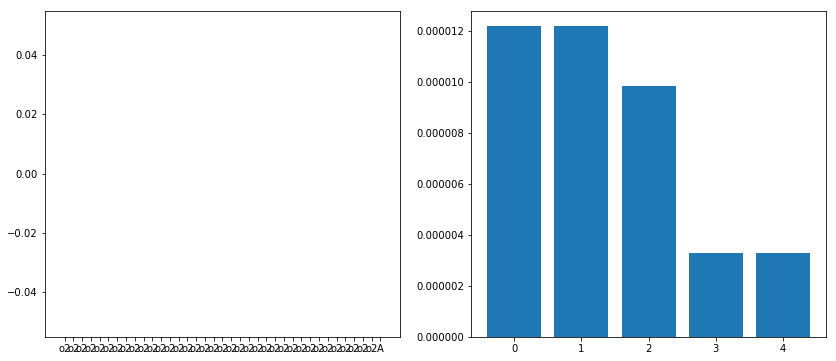

In [378]:
idx_to_plot = 17
fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,6)
c_test.plot_distribution(idx_to_plot, dist_type='F', ax=axs[0])
axs[1].bar(list(range(len(c_test.sorted_index[:top_n]))),[c_test.distributions[idx].best_score for idx in c_test.sorted_index[:top_n]])

print(list_of_replacements[idx_to_plot].group(0))

In [38]:
import  common.models as DB
from common.lib.predictive_pipeline.predictor_service import PredictorService
from common.lib.sectioning.Document import DocPos

In [64]:
doc = DB.Document.objects.get(pk=2)

In [48]:
doc_ids = []

In [54]:
for i in range(30):
    if 'evaluationset' in DB.Document.objects.get(pk=i+1).filename:
        doc_ids.append(DB.Document.objects.get(pk=i+1).id)

In [5]:
doc.document_type

<DocumentType: DocumentType object>

In [6]:
DB.Question.objects.get(qnum='2').id

2

In [7]:
ps = PredictorService(doc.document_type)

In [55]:
ans_ids = ps.predict_answers(2,doc_ids)

In [63]:
for d_id,a_id in zip(doc_ids,ans_ids):
    ans = DB.Answer.objects.get(pk=a_id)
    doc = DB.Document.objects.get(pk=d_id)
    sectioning_doc = doc.files.get_sectioned()
    print('FILE: {}'.format(sectioning_doc._fileName))
    if ans.answer_positions:
        for rng in ans.answer_positions:
            sPos = sectioning_doc.posFromJson(rng['startPos'])
            ePos = sectioning_doc.posFromJson(rng['endPos'])
            print(sectioning_doc.getTextInRange(sPos,sectioning_doc.getPos(ePos, 1000)),'\n')
    print('-'*50,'\n')

FILE: 21_B&N_evaluationset
(b) Without limiting the foregoing but subject to the limitations with respect to Real Estate set forth in 
paragraph (e) of this Section 6.12, each Loan Party will, and will cause each Subsidiary that is a Loan Party to, execute and deliver, or cause to be executed and delivered, to the Collateral Agent such documents, agreements and instruments, and will take or cause to be taken such further actions (including the filing and recording of financing statements, fixture filings, mortgages, deeds of trust and other documents and such other actions or deliveries of the type required by Section 4.01, as applicable, and, if the Borrowers request, in their discretion and subject to satisfaction of the Real Estate Eligibility Requirements, to include any Real Estate in the Borrowing Base, including the delivery of the Mortgage Related Documents with respect to all such Real Estate), which may be required by law or which the Administrative Agent or the Required Lend

IndexError: list index out of range

In [10]:
ans1 = DB.Answer.objects.get(pk=ans_ids[0])

In [13]:
ans1.__dict__

{'_document_cache': <Document: 12_ellevio_trainingset>,
 '_pipeline_cache': <Pipeline: Pipeline object>,
 '_question_cache': <Question: What is the commitment amount of the revolving credit agrement?>,
 '_seedling_cache': <Seedling: Seedling object>,
 '_state': <django.db.models.base.ModelState at 0x7fc1bebe01d0>,
 'answer_positions': [{'endPos': {'0': 365, '1': 40},
   'startPos': {'0': 365, '1': 1}}],
 'answer_probabilities': [0.317],
 'archived': False,
 'created_at': datetime.datetime(2018, 2, 15, 17, 38, 44, 522201, tzinfo=<UTC>),
 'document_id': 2,
 'expanded_answer': [],
 'flag': <AnswerFlags.low_confidence: 2>,
 'id': 222,
 'pipeline_id': 1,
 'prob_heatmap': [0.001,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  

In [65]:
sectioning_doc = doc.files.get_sectioned()

In [66]:
rng = ans1.answer_positions[0]
sPos = sectioning_doc.posFromJson(rng['startPos'])
ePos = sectioning_doc.posFromJson(rng['endPos'])
sectioning_doc.getTextInRange(sPos,sectioning_doc.getPos(ePos, 1000))

'Total Capex Facility Commitments” means the aggregate of the Capex Facility Commitments, being SEK8,100,000,000 at the date of this Agreement; \n “Total Commitments” means the aggregate of the Total Facility A1 Commitments, Total Facility A2 Commitments, Total Facility A3 Commitments, the Total Capex Facility Commitments and the Total WC Facility Commitments; \n “Total Facility A1 Commitments” means the aggregate of the Facility A1 Commitments, being SEK10,000,000,000 at the date of this Agreement; \n “Total Facility A2 Commitments” means the aggregate of the Facility A2 Commitments, being SEK10,000,000,000 at the date of this Agreement; \n “Total Facility A3 Commitments” means the aggregate of the Facility A3 Commitments, being SEK6,058,946,600 at the date of this Agreement; \n “Total WC Facility Commitments” means the aggregate of the WC Facility Commitments, being SEK1,158,935,653.08 at the date of this Agreement; \n “Transfer Certificate” means a certificate substantially in the f

<IPython.core.display.Javascript object>


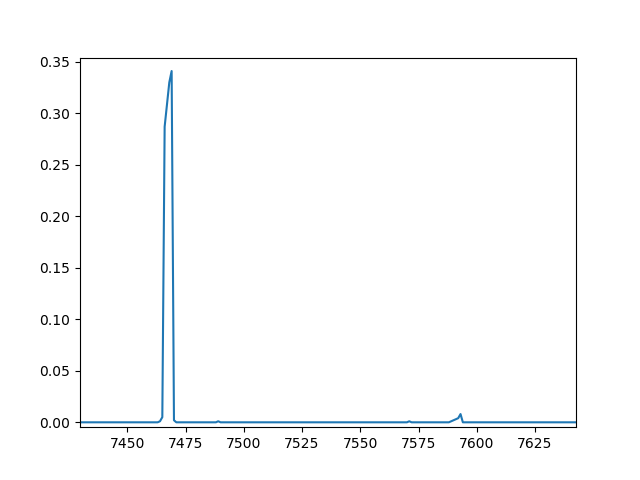

In [46]:
plt.plot(ans1.prob_heatmap)

    

In [16]:
import numpy as np

In [24]:
A = np.random.rand(300,300)
Ainv = np.linalg.inv(A)

In [26]:
np.dot(A,Ainv).shape

(300, 300)

In [76]:
mytuple = ()


In [80]:
mysecondtuple + 4

NameError: name 'mysecondtuple' is not defined

In [1]:
import sys
import os
import re
import json
import en_core_web_sm

import matplotlib.pyplot as plt
%matplotlib notebook

from sbow_signal_implementation import SBoWSignalCalculator

def get_ordered_files():
    with open('Revolving_Loan_cheatsheet.json') as jsonfile:
        raw_data = json.load(jsonfile)
    docs_in_order = [raw_data[0]['Data'][i]['document_name'] for i in range(len(raw_data[0]['Data']))] 
    return docs_in_order

In [2]:
ordered_docs = get_ordered_files()

In [7]:
doc_id = 1
spacy_model = en_core_web_sm.load()
filepath = '/home/petar.petrov/Desktop/Project_Beaker_PoC/ING_POC/{}'.format(ordered_docs[doc_id])
ngram = 2
vocab_filename = 'bow_vocab_ngram_{}.pkl'.format(ngram)
cheatsheet = 'Revolving_Loan_cheatsheet.json'

In [8]:
file1 = SBoWSignalCalculator(vocab_filename, ngram, filepath, doc_id, spacy_model, cheatsheet)

In [9]:
file1.build_both_signals(window=20)
file1.get_both_span_lists()

peak score: 515.2303313392571; and position: 4976 of top 10 words


<IPython.core.display.Javascript object>


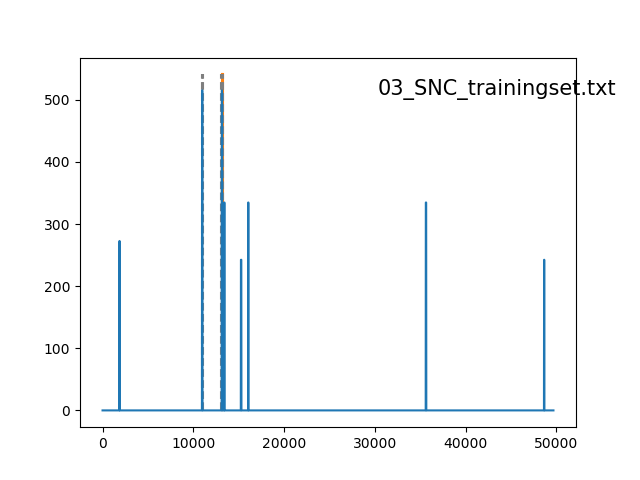

In [10]:
fig,ax = plt.subplots(1,1)

ax = file1.plot_signal(ax=ax, raw=True)

In [3]:
#ALP version
from alp_signal_implementation import ALPAutoProbeSignalCalculator

In [8]:
doc_id = 2
spacy_model = en_core_web_sm.load()
filepath = '/home/petar.petrov/Desktop/Project_Beaker_PoC/ING_POC/{}'.format(ordered_docs[doc_id])
param_point = [5,0.7,1.5]
probe_filename = 'probes_with_pp_l{0}_c{1}_r{2}.pkl'.format(*param_point)
cheatsheet = 'Revolving_Loan_cheatsheet.json'

In [9]:
file1 = ALPAutoProbeSignalCalculator(probe_filename, param_point, filepath, doc_id, spacy_model, cheatsheet)

In [10]:
file1.build_both_signals(window=20)
file1.get_both_span_lists()

peak score: 1.9574827126030883; and position: 3735 of probe: base currenc revolv credit facil aggreg equal total capex facil commit capabl reborrow contempl agreement
peak score: 0.9219573365502995; and position: 3737 of probe: borrow multicurr revolv credit facil aggreg
peak score: 1.0608907864959045; and position: 3717 of probe: subject term agreement lender avail borrow
peak score: 0.7589102823133795; and position: 3534 of probe: subject term condit hereof lender
peak score: 0.7589102823133795; and position: 3534 of probe: subject term condit set forth


<IPython.core.display.Javascript object>


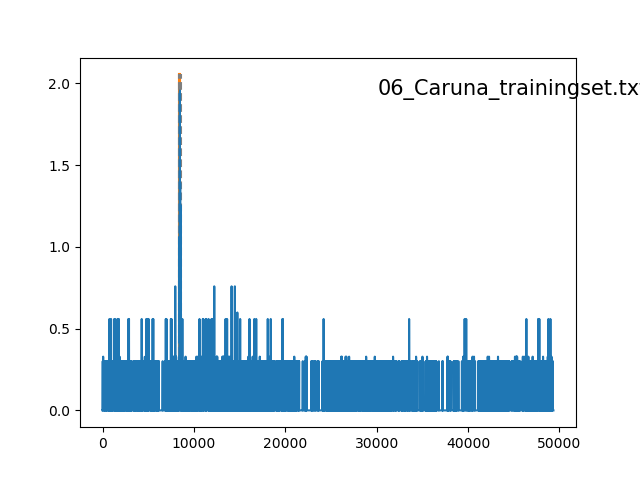

In [11]:
fig,ax = plt.subplots(1,1)

ax = file1.plot_signal(ax=ax, raw=True)